In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/IBM/covid19-india-data/refs/heads/main/data/csv/UK/UK_district_cases.csv')

In [3]:
df.head()

,date,district_name,cases_total,recovered_total,active_cases,deaths_total,migrated_total
0,2020-05-25,Almora,12,3,9,0,0
1,2020-05-25,Bageshwar,8,0,8,0,0
2,2020-05-25,Chamoli,11,0,11,0,0
3,2020-05-25,Champawat,8,0,8,0,0
4,2020-05-25,Dehradun,76,29,41,3,3


Text(0, 0.5, 'Recovered')

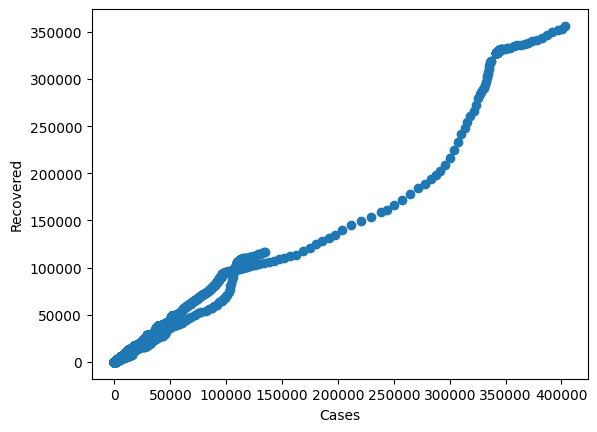

In [4]:
plt.scatter(df['cases_total'],df['recovered_total'])
plt.xlabel('Cases')
plt.ylabel('Recovered')

In [7]:
x=df.iloc[:,2:3]
y=df.iloc[:,3:4]

In [8]:
x.head()

,cases_total
0,12
1,8
2,11
3,8
4,76


In [9]:
from sklearn.model_selection import train_test_split
x_train,t_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [11]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Text(0, 0.5, 'Recovered')

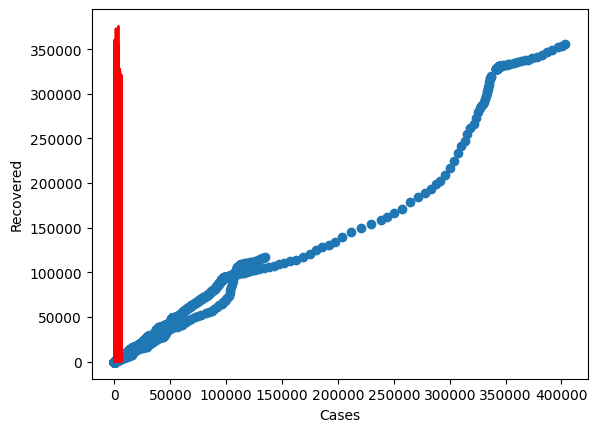

In [12]:
plt.scatter(df['cases_total'],df['recovered_total'])
plt.plot(lr.predict(x_train),color='red')
plt.xlabel('Cases')
plt.ylabel('Recovered')

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=lr.predict(t_test)

In [17]:
y_test.values

array([[12127],
       [11967],
       [   65],
       ...,
       [   24],
       [  353],
       [ 2800]], shape=(1546, 1))

In [18]:
print("MAE",mean_absolute_error(y_pred,y_test))

MAE 1354.9397019038313


In [19]:
print("MSE",mean_squared_error(y_pred,y_test))

MSE 15333186.00407811


In [21]:
print("RMSE",np.sqrt(mean_squared_error(y_pred,y_test)))

RMSE 3915.7612291964524


In [24]:
print("MSE",r2_score(y_pred,y_test))
r2=r2_score(y_pred,y_test)

MSE 0.9952818057842878


In [23]:
t_test.shape

(1546, 1)

In [25]:
1-((1-r2)*(1546-1)/(1546-1-1))

0.9952787499590185

In [26]:
df.head()

,date,district_name,cases_total,recovered_total,active_cases,deaths_total,migrated_total
0,2020-05-25,Almora,12,3,9,0,0
1,2020-05-25,Bageshwar,8,0,8,0,0
2,2020-05-25,Chamoli,11,0,11,0,0
3,2020-05-25,Champawat,8,0,8,0,0
4,2020-05-25,Dehradun,76,29,41,3,3


In [27]:
x=df.iloc[:,2:4]
y=df.iloc[:,4:5]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
x_train.head()

,cases_total,recovered_total
5211,7529,7282
3839,1822,1790
1561,1590,922
2402,2196,1814
2377,73527,66855


In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
y_pred=lr.predict(x_test)

In [36]:
print("R2 Score:",r2_score(y_pred,y_test))
r2=r2_score(y_pred,y_test)

R2 Score: 0.9968032596136174


In [37]:
1-(1-r2)*(40-1)/(40-1-2)

0.9966304628359751

/home/codespace/.local/lib/python3.12/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


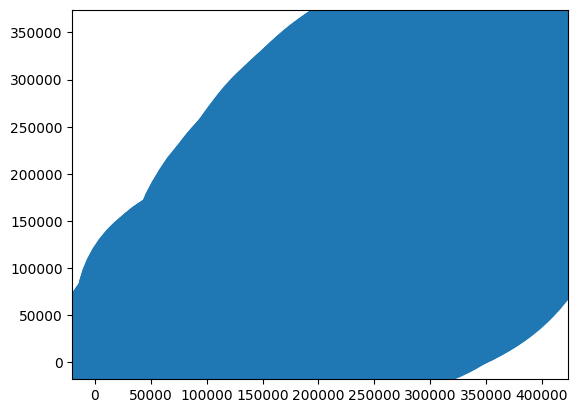

In [39]:
plt.scatter(df['cases_total'],df['recovered_total'],df['active_cases'])